In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('C:\\Users\\shali\\OneDrive\\Desktop\\traffic.csv')

In [4]:
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
import datetime as dt

In [7]:
df['DateTime']=pd.to_datetime(df['DateTime'])

In [8]:
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Date_no'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Day'] = df.DateTime.dt.strftime("%A")

In [9]:
df.set_index(['DateTime'],inplace=True)

In [10]:
import matplotlib.pyplot as plt

In [11]:
df.drop(['ID'],axis=1,inplace=True) #Execute Once

In [12]:
df.head()

,Junction,Vehicles,Year,Month,Date_no,Hour,Day
DateTime,,,,,,,
2015-11-01 00:00:00,1,15,2015,11,1,0,Sunday
2015-11-01 01:00:00,1,13,2015,11,1,1,Sunday
2015-11-01 02:00:00,1,10,2015,11,1,2,Sunday
2015-11-01 03:00:00,1,7,2015,11,1,3,Sunday
2015-11-01 04:00:00,1,9,2015,11,1,4,Sunday


In [13]:
df['Day'].unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [14]:
df['Day']=df['Day'].map({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})

In [16]:
import seaborn as sns

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

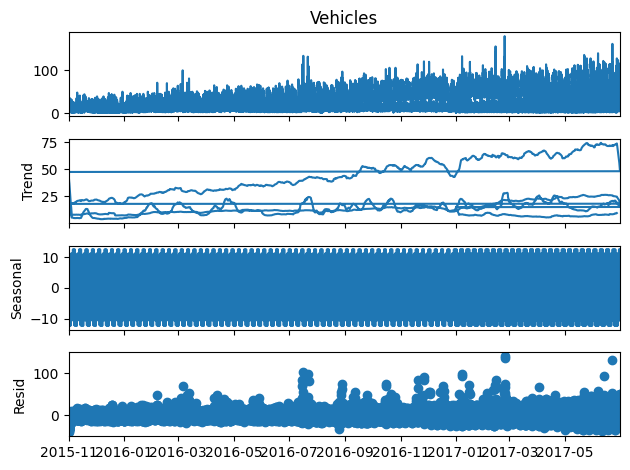

<Figure size 3000x800 with 0 Axes>

In [19]:
dec = seasonal_decompose(df['Vehicles'],period =24*7).plot()
plt.figure(figsize=(30,8))
plt.show()

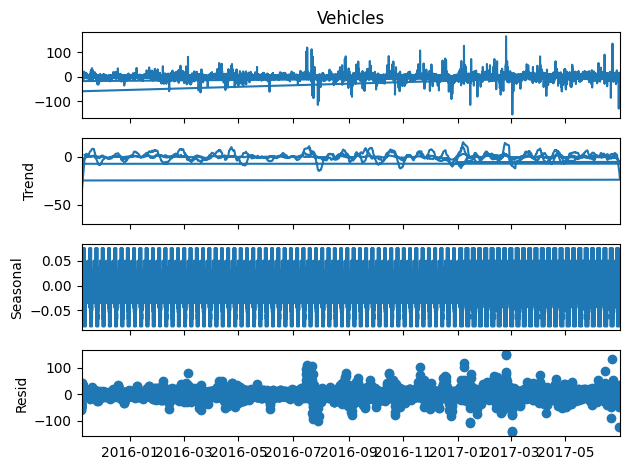

In [20]:
data_diff_seas = df['Vehicles'] - df['Vehicles'].shift(168)
data_diff_seas = data_diff_seas.dropna()

dec =seasonal_decompose(data_diff_seas, period=168).plot()


In [21]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df['Vehicles'])
print(result[0])
print(result[1])

-7.5182781119357225
3.851060199915544e-11


In [22]:
#It is already Stationary Data as found out by augmented dicky fuller test

<Axes: xlabel='DateTime', ylabel='Vehicles'>

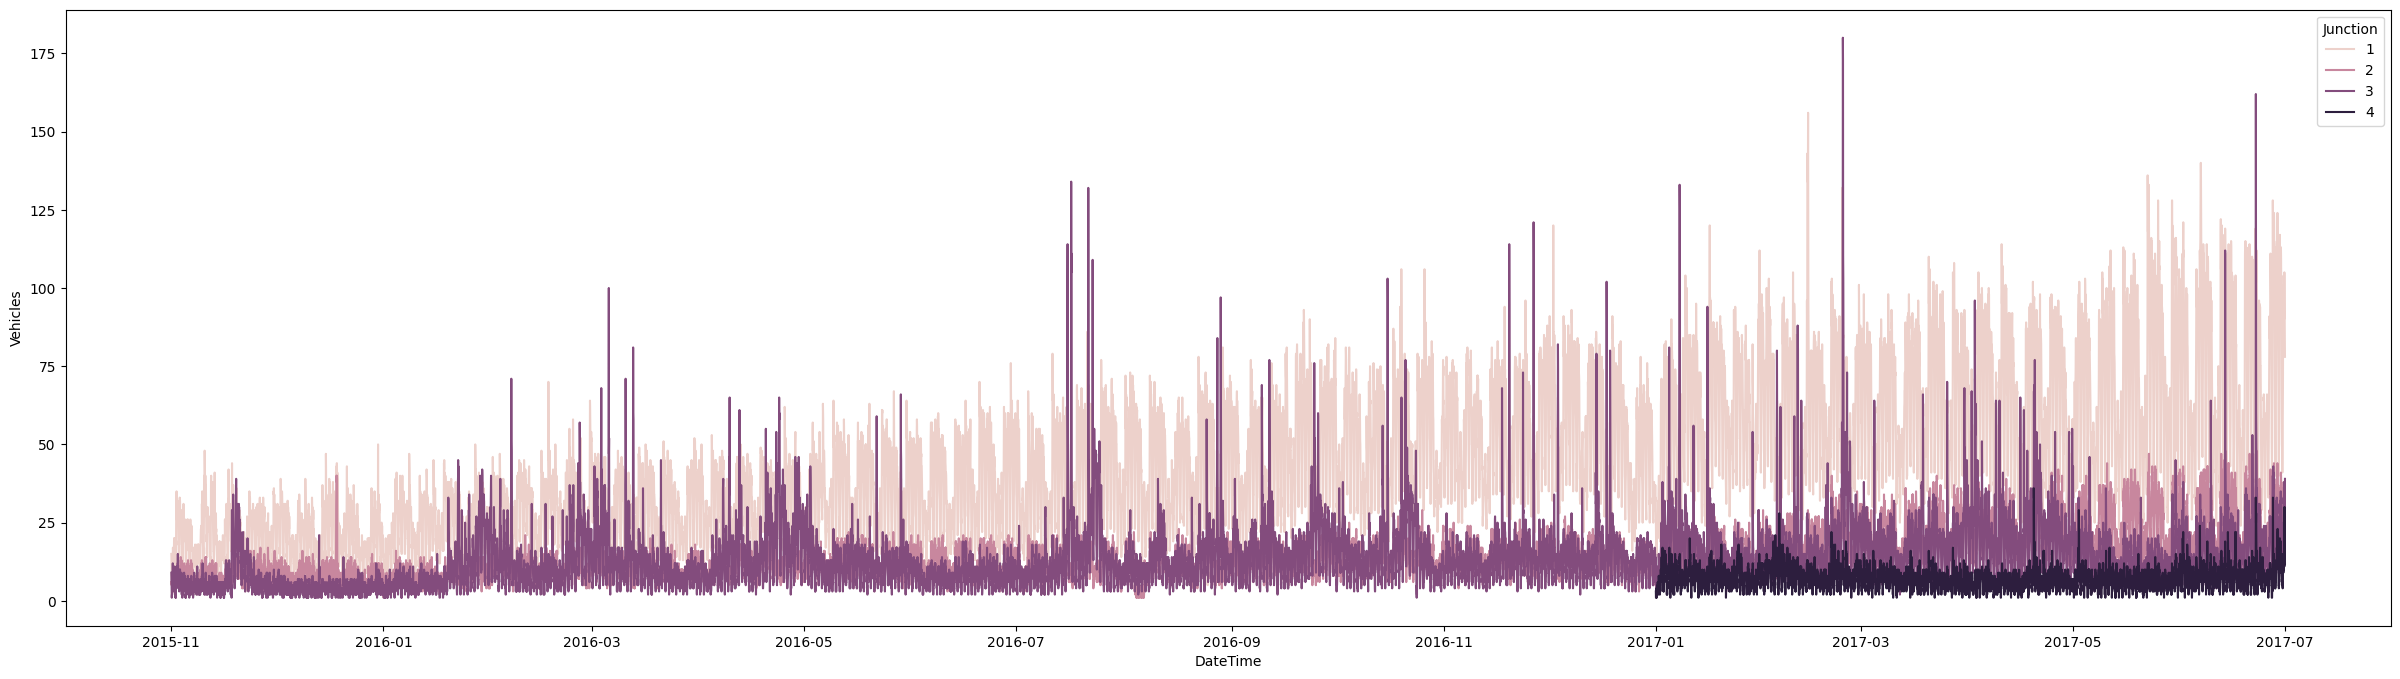

In [23]:
plt.figure(figsize=(30,8))
sns.lineplot(data=df,x=df.index,y='Vehicles',hue='Junction')

Text(0.5, 0, 'Date')

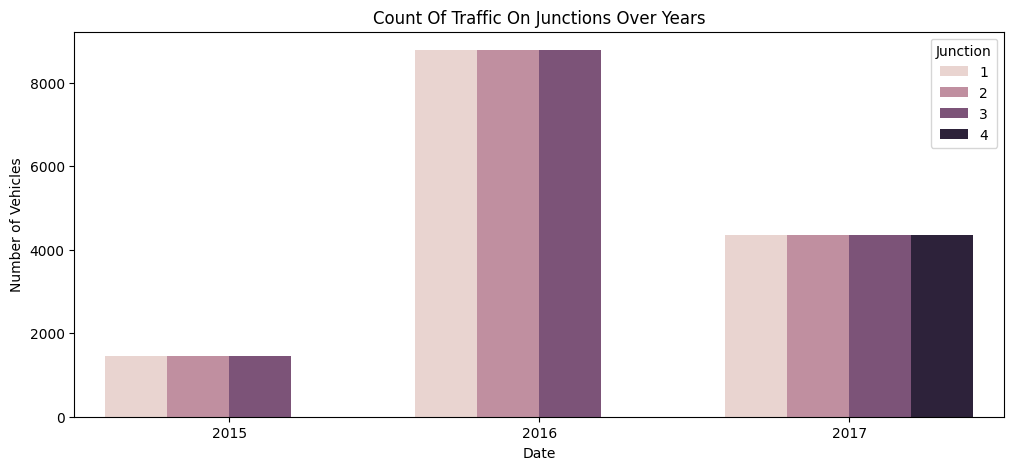

In [24]:
plt.figure(figsize=(12,5))
count = sns.countplot(data=df, x =df["Year"], hue="Junction")
count.set_title("Count Of Traffic On Junctions Over Years")
count.set_ylabel("Number of Vehicles")
count.set_xlabel("Date")

In [25]:
df

,Junction,Vehicles,Year,Month,Date_no,Hour,Day
DateTime,,,,,,,
2015-11-01 00:00:00,1,15,2015,11,1,0,7
2015-11-01 01:00:00,1,13,2015,11,1,1,7
2015-11-01 02:00:00,1,10,2015,11,1,2,7
2015-11-01 03:00:00,1,7,2015,11,1,3,7
2015-11-01 04:00:00,1,9,2015,11,1,4,7
...,...,...,...,...,...,...,...
2017-06-30 19:00:00,4,11,2017,6,30,19,5
2017-06-30 20:00:00,4,30,2017,6,30,20,5
2017-06-30 21:00:00,4,16,2017,6,30,21,5


In [26]:
#Normalizing the Vehicles column
mean = np.mean(df['Vehicles'])
std = np.std(df['Vehicles'])
df['Vehicles'] = (df['Vehicles'] - mean ) / std

In [27]:
df

,Junction,Vehicles,Year,Month,Date_no,Hour,Day
DateTime,,,,,,,
2015-11-01 00:00:00,1,-0.375489,2015,11,1,0,7
2015-11-01 01:00:00,1,-0.471875,2015,11,1,1,7
2015-11-01 02:00:00,1,-0.616454,2015,11,1,2,7
2015-11-01 03:00:00,1,-0.761034,2015,11,1,3,7
2015-11-01 04:00:00,1,-0.664648,2015,11,1,4,7
...,...,...,...,...,...,...,...
2017-06-30 19:00:00,4,-0.568261,2017,6,30,19,5
2017-06-30 20:00:00,4,0.347408,2017,6,30,20,5
2017-06-30 21:00:00,4,-0.327296,2017,6,30,21,5


In [28]:
#Creating intervals for X and y for different timestamps 24,168, etc.
def intervals(data, time_steps=1):
    sequences, labels = [], []
    for i in range(len(data) - time_steps):
        sequences.append(data.iloc[i:(i + time_steps)].values)
        labels.append(data.iloc[i + time_steps]['Vehicles'])
    return np.array(sequences), np.array(labels)

In [29]:
time_steps = 24 #We can take 168 also to check if it varies in a weekly basis or not
X, y = intervals(df, time_steps)

In [30]:
X_train=X[0:40000]
y_train=y[0:40000]
X_val=X[40000:45000]
y_val=y[40000:45000]
X_test=X[45000:]
y_test=y[45000:]

In [31]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((40000, 24, 7), (40000,), (5000, 24, 7), (5000,), (3096, 24, 7), (3096,))

In [34]:


from tensorflow.keras import callbacks




In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(LSTM(256,input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(Dropout(0.2))
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(1))

model1.summary()

C:\Users\shali\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 256)            │       270,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │         4,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 274,465 (1.05 MB)

 Trainable params: 274,465 (1.05 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
cp1 = ModelCheckpoint('model1/model1.keras', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])


In [39]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, callbacks=[cp1])

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 27ms/step - loss: 1.1334 - root_mean_squared_error: 1.0645 - val_loss: 0.4171 - val_root_mean_squared_error: 0.6459
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - loss: 0.9666 - root_mean_squared_error: 0.9827 - val_loss: 0.1748 - val_root_mean_squared_error: 0.4181
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - loss: 0.4315 - root_mean_squared_error: 0.6562 - val_loss: 0.1919 - val_root_mean_squared_error: 0.4381
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 27ms/step - loss: 0.2694 - root_mean_squared_error: 0.5189 - val_loss: 0.1964 - val_root_mean_squared_error: 0.4432
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - loss: 0.2312 - root_mean_squared_error: 0.4808 - val_loss: 0.1731 - val_root_mean_squared_error: 0.4160
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 67s 53ms/step - loss: 0.2122 - root_mean_squared_error: 0.4604 - val_loss: 0.1553 - val_root_mean_squared_error: 0.3940
Epoch 7/15
1250/1250 ━━━━━━━

In [40]:
loss = model1.evaluate(X_test, y_test)
print(f'Test Loss: {loss*100}%')

97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0263 - root_mean_squared_error: 0.1618
Test Loss: [0.02864026091992855, 0.16923433542251587, 0.02864026091992855, 0.16923433542251587, 0.02864026091992855, 0.16923433542251587, 0.02864026091992855, 0.16923433542251587, 0.02864026091992855, 0.16923433542251587, 0.02864026091992855, 0.16923433542251587, 0.02864026091992855, 0.16923433542251587, 0.02864026091992855, 0.16923433542251587, 0.02864026091992855, 0.16923433542251587, 0.02864026091992855, 0.16923433542251587, 0.02864026091992855, 0.16923433542251587, 0.02864026091992855, 0.16923433542251587, 0.02864026091992855, 0.16923433542251587, 0.02864026091992855, 0.16923433542251587, 0.02864026091992855, 0.16923433542251587, 0.02864026091992855, 0.16923433542251587, 0.02864026091992855, 0.16923433542251587, 0.02864026091992855, 0.16923433542251587, 0.02864026091992855, 0.16923433542251587, 0.02864026091992855, 0.16923433542251587, 0.02864026091992855, 0.16923433542251587, 0.0286402609199285

In [41]:
y_pred = model1.predict(X_test)

97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [42]:
#Inversing the predictions from normal distributed data
y_test_inv = (y_test * std) + mean
y_pred_inv = (y_pred * std) + mean

In [122]:
from sklearn.metrics import mean_squared_error

In [44]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f'Test - Mean Squared Error: {mse}')


Test - Mean Squared Error: 12.331239443855376


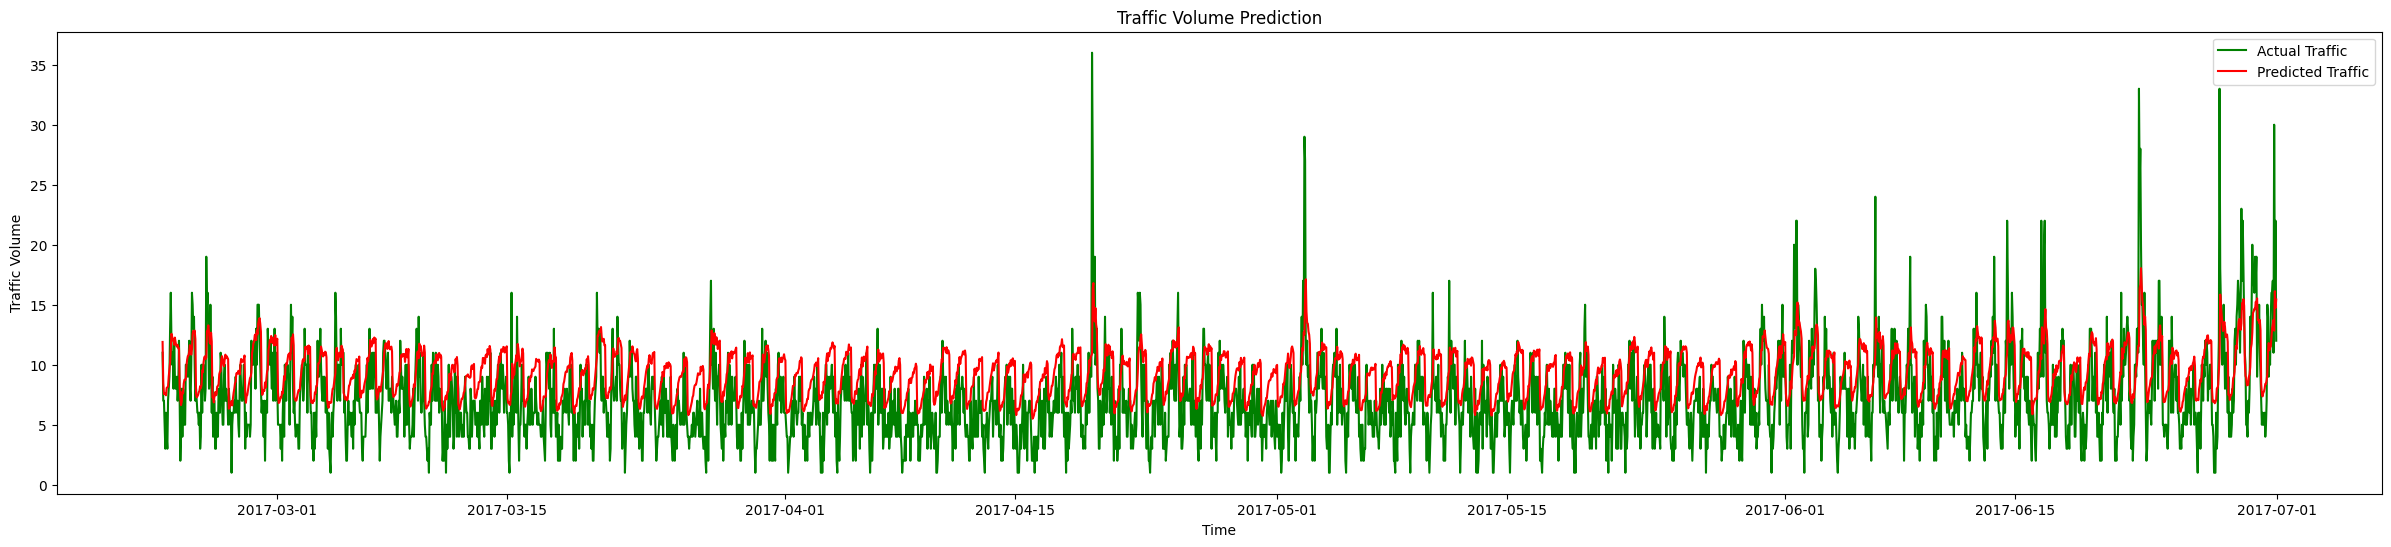

In [45]:
#Final Plotting
plt.figure(figsize=(30, 6))
plt.plot(df.index[-len(y_test):], y_test_inv, color='green', label='Actual Traffic')
plt.plot(df.index[-len(y_test):], y_pred_inv, color='red', label='Predicted Traffic')
plt.title('Traffic Volume Prediction')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

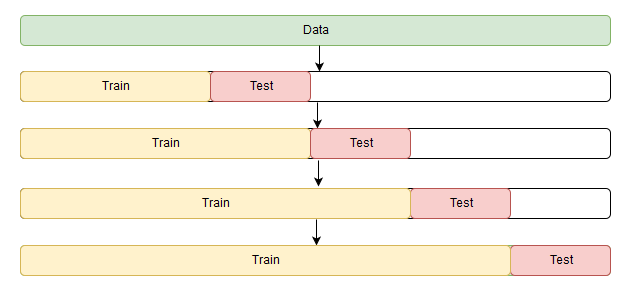

In [47]:
# MANUAL CROSS VALIDATION FOR TIME SERIES DATA

X_train1, y_train1 = X[:10000], y[:10000]
X_val1, y_val1 = X[10000:15000], y[10000:15000]

X_train2, y_train2 = X[:15000], y[:15000]
X_val2, y_val2 = X[15000:20000], y[15000:20000]

X_train3, y_train3 = X[:25000], y[:25000]
X_val3, y_val3 = X[25000:30000], y[25000:30000]

X_train4, y_train4 = X[:35000], y[:35000]
X_val4, y_val4 = X[35000:40000], y[35000:40000]

X_train5, y_train5 = X[:45000], y[:45000]
X_val5, y_val5 = X[45000:47000], y[45000:47000]

X_test1, y_test1 = X[47000:], y[47000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape,X_train2.shape, y_train2.shape, X_val2.shape, y_val2.shape,

((10000, 24, 7),
 (10000,),
 (5000, 24, 7),
 (5000,),
 (1096, 24, 7),
 (1096,),
 (15000, 24, 7),
 (15000,),
 (5000, 24, 7),
 (5000,))

In [48]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp1])
model1.fit(X_train2, y_train2, validation_data=(X_val2, y_val2), epochs=10, callbacks=[cp1])
model1.fit(X_train3, y_train3, validation_data=(X_val3, y_val3), epochs=10, callbacks=[cp1])
model1.fit(X_train4, y_train4, validation_data=(X_val4, y_val4), epochs=10, callbacks=[cp1])
model1.fit(X_train5, y_train5, validation_data=(X_val5, y_val5), epochs=10, callbacks=[cp1])

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - loss: 0.1404 - root_mean_squared_error: 0.3746 - val_loss: 0.0852 - val_root_mean_squared_error: 0.2919
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - loss: 0.1343 - root_mean_squared_error: 0.3665 - val_loss: 0.1075 - val_root_mean_squared_error: 0.3278
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - loss: 0.1306 - root_mean_squared_error: 0.3613 - val_loss: 0.0955 - val_root_mean_squared_error: 0.3090
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - loss: 0.1310 - root_mean_squared_error: 0.3618 - val_loss: 0.0906 - val_root_mean_squared_error: 0.3009
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - loss: 0.1216 - root_mean_squared_error: 0.3487 - val_loss: 0.0878 - val_root_mean_squared_error: 0.2963
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - loss: 0.1210 - root_mean_squared_error: 0.3478 - val_loss: 0.0880 - val_root_mean_squared_error: 0.2967
Epoch 7/10
1250/1250 ━━━━━━━

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0203 - root_mean_squared_error: 0.1423
Test Loss: [0.022841043770313263, 0.15113253891468048, 0.022841043770313263, 0.15113253891468048, 0.022841043770313263, 0.15113253891468048, 0.022841043770313263, 0.15113253891468048, 0.022841043770313263, 0.15113253891468048, 0.022841043770313263, 0.15113253891468048, 0.022841043770313263, 0.15113253891468048, 0.022841043770313263, 0.15113253891468048, 0.022841043770313263, 0.15113253891468048, 0.022841043770313263, 0.15113253891468048, 0.022841043770313263, 0.15113253891468048, 0.022841043770313263, 0.15113253891468048, 0.022841043770313263, 0.15113253891468048, 0.022841043770313263, 0.15113253891468048, 0.022841043770313263, 0.15113253891468048, 0.022841043770313263, 0.15113253891468048, 0.022841043770313263, 0.15113253891468048, 0.022841043770313263, 0.15113253891468048, 0.022841043770313263, 0.15113253891468048, 0.022841043770313263, 0.15113253891468048, 0.022841043770313263, 0.151132538914680

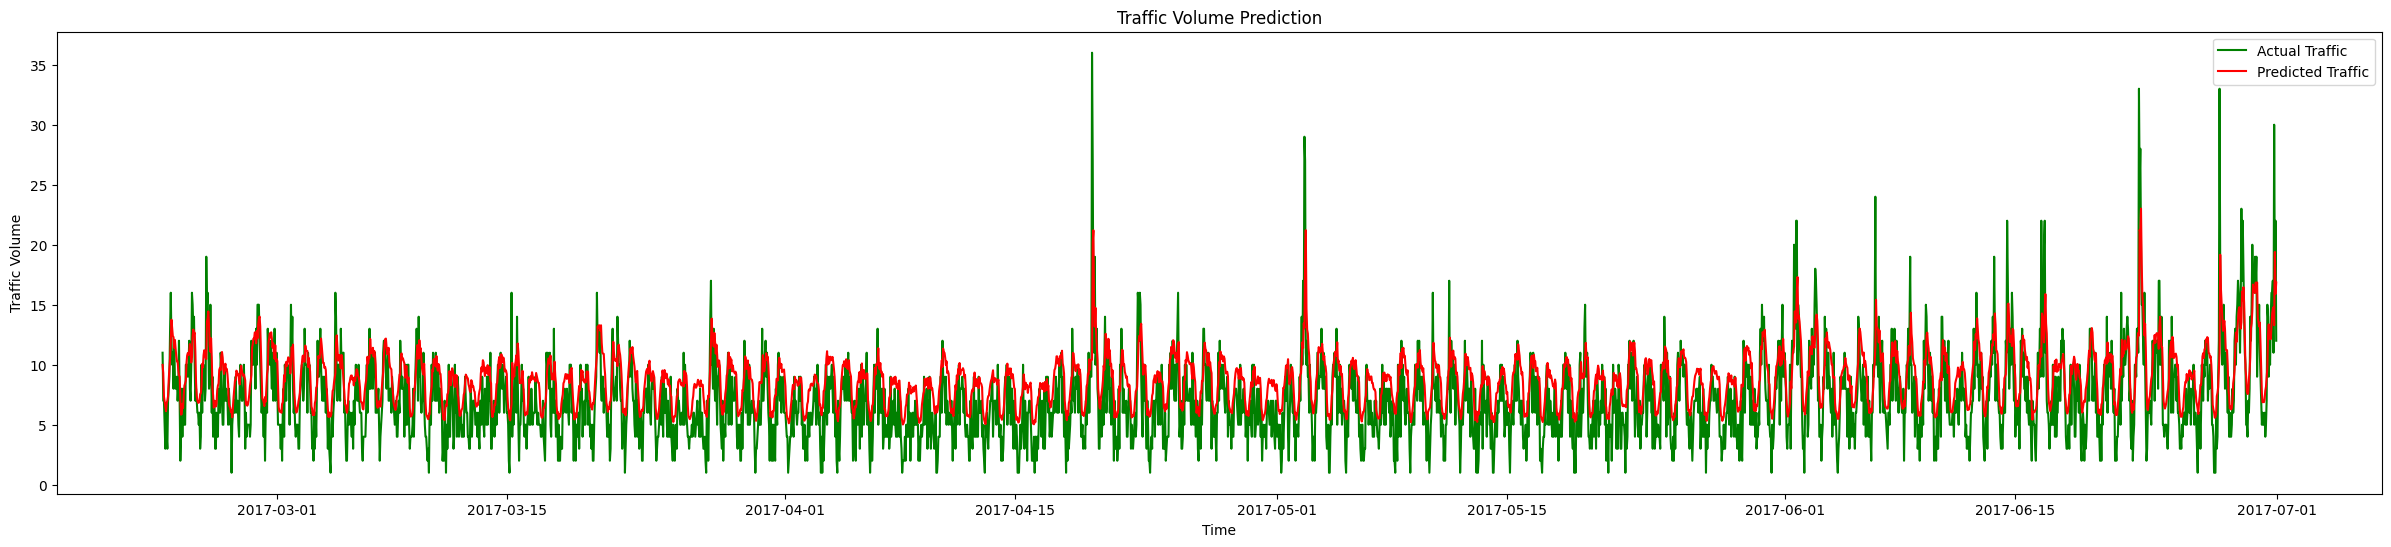

In [49]:
loss = model1.evaluate(X_test1, y_test1)
print(f'Test Loss: {loss*100}%')
y_pred = model1.predict(X_test)
y_test_inv = (y_test * std) + mean
y_pred_inv = (y_pred * std) + mean
mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f'Test - Mean Squared Error: {mse}')
plt.figure(figsize=(30, 6))
plt.plot(df.index[-len(y_test):], y_test_inv, color='green', label='Actual Traffic')
plt.plot(df.index[-len(y_test):], y_pred_inv, color='red', label='Predicted Traffic')
plt.title('Traffic Volume Prediction')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()